In [1]:
# example to illustrate machine error using large error constant C
# to make it easier to see graphically
import numpy as np
import matplotlib.pyplot as plt

Example 1

In [140]:
# define array size
N = int(1e6)
# define number of bins for histogram
N_Bins = 100
# define C, which is our simulated error constant
C = 5e-3

# define numbers
(x1, x2) = (3, -3.2)
# define error standard deviations in terms of C
sigma1 = C*abs(x1)
sigma2 = C*abs(x2)
# define distributions to those numbers satisfying sigma = Cx
# This is how we simulate error.
d1 = np.random.normal(loc=x1, scale=sigma1, size=N)
d2 = np.random.normal(loc=x2, scale=sigma2, size=N)

# then add up the distributions
sumd = d1 + d2

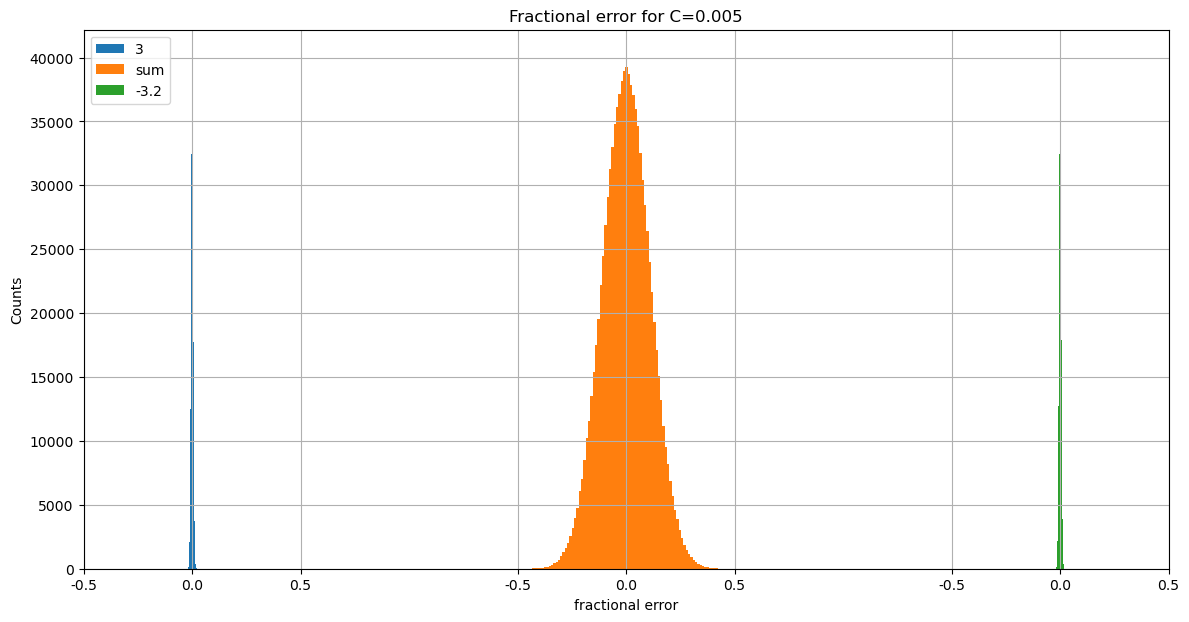

In [141]:
# then plot fractional error by dividing by the mean values.
# fractional errors will be large for opposite-signed large numbers
# offset and spread have to be adjusted to make the plots clear.
plt.figure(figsize=(14, 7))
offset = 2
spread = offset/4.0

plt.hist(-offset+(d1-x1)/x1, N_Bins, histtype='stepfilled')
plt.hist((sumd-(x1+x2))/(x1+x2), N_Bins, histtype='stepfilled')
plt.hist(offset+(d2-x2)/x2, N_Bins, histtype='stepfilled')

plt.xticks([-offset-spread, -offset, -offset+spread, -spread, 0,
            spread, offset-spread, offset, offset+spread],
           [str(-spread), str(0.0), str(spread), str(-spread),
            str(0.0), str(spread), str(-spread), str(0.0), str(spread)])

plt.grid()
plt.xlabel('fractional error')
plt.legend((str(x1), 'sum', str(x2)), loc='upper left')
plt.title(f"Fractional error for C={C}")
plt.ylabel("Counts")
plt.show()

As C decreases, the spread in the fractional error for each distribution also decreases, since there is a larger constraint on the values of the variables

In [145]:
# define array size
N = int(1e6)
# define number of bins for histogram
N_Bins = 100
# define C, which is our simulated error constant
C = 2.5e-2

# define numbers
(x1, x2) = (3, -3.2)
# define error standard deviations in terms of C
sigma1 = C*abs(x1)
sigma2 = C*abs(x2)
# define distributions to those numbers satisfying sigma = Cx
# This is how we simulate error.
d1 = np.random.normal(loc=x1, scale=sigma1, size=N)
d2 = np.random.normal(loc=x2, scale=sigma2, size=N)

# then add up the distributions
sumd = d1 + d2

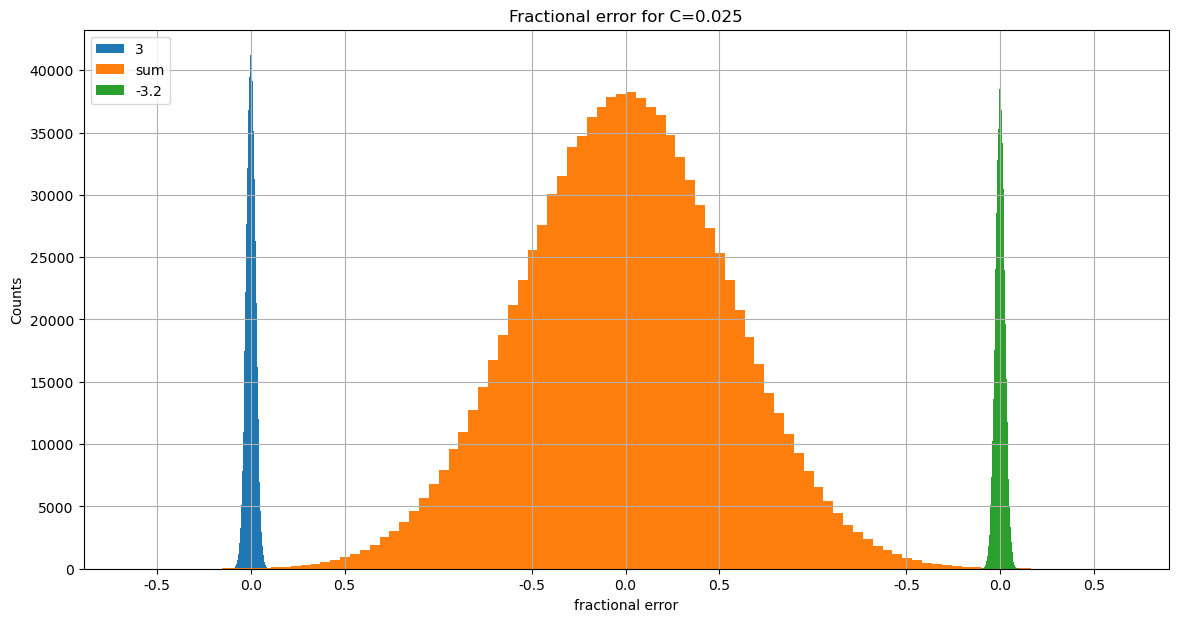

In [146]:
# then plot fractional error by dividing by the mean values.
# fractional errors will be large for opposite-signed large numbers
# offset and spread have to be adjusted to make the plots clear.
plt.figure(figsize=(14, 7))
offset = 2
spread = offset/4.0

plt.hist(-offset+(d1-x1)/x1, N_Bins, histtype='stepfilled')
plt.hist((sumd-(x1+x2))/(x1+x2), N_Bins, histtype='stepfilled')
plt.hist(offset+(d2-x2)/x2, N_Bins, histtype='stepfilled')

plt.xticks([-offset-spread, -offset, -offset+spread, -spread, 0,
            spread, offset-spread, offset, offset+spread],
           [str(-spread), str(0.0), str(spread), str(-spread),
            str(0.0), str(spread), str(-spread), str(0.0), str(spread)])

plt.grid()
plt.xlabel('fractional error')
plt.legend((str(x1), 'sum', str(x2)), loc='upper left')
plt.title(f"Fractional error for C={C}")
plt.ylabel("Counts")
plt.show()

As C increases, the spread in the fractional errors also increase, since there is more variation in the values of the functions

Example 2

Added 290.5 to the dataset

In [90]:
#actual code
import numpy as np
# define the relative error function
def relative_error(x,y):
    """Relative error as abs((x-y)/y)"""
    return abs((x-y)/y)
# define the two methods for calculating standard deviation
def std2(x):
    """two pass"""
    return np.sqrt(np.sum(np.square(x-np.mean(x)))/(x.size-1))
def std1(x):
    """one pass"""
    var = (np.sum(np.square(x))-x.size*np.square(np.mean(x)))/(x.size-1)
    if var < 0:
        print("Negative variance")
    return np.sqrt(np.abs(var))
def npstd(x):
    """Numpy standard deviation, 1 degree of freedom"""
    return np.std(x,ddof=1)

# load the text data
data = np.loadtxt("cdata.txt")
data = np.append(data, [290.5, 250])
# calculate the standard deviation from three methods
result = dict(np=npstd, one=std1, two=std2)
# calculate the relative error and print the results
error = dict()
actual = np.std(data, ddof=1)
for k,v in result.items():
    result[k] = v(data)
    error[k] = relative_error(result[k],actual)
    print(k,result[k])

np 5.063501310046983
one 5.063501310047303
two 5.063501310046983


In [91]:
print('The one-pass method gives sigma = ', result["one"])
print('The two-pass method gives sigma = ', result["two"])
print('              numpy gives sigma = ', result["np"])
print(' ')
print('The one-pass method gives has relative error = ', error["one"])
print('The two-pass method gives has relative error = ', error["two"])

The one-pass method gives sigma =  5.063501310047303
The two-pass method gives sigma =  5.063501310046983
              numpy gives sigma =  5.063501310046983
 
The one-pass method gives has relative error =  6.314686449426005e-14
The two-pass method gives has relative error =  0.0


Tthe one-pass method results in a larger error because it the square of x and the mean of x are computed before taking their differences. Precision error causes a larger error in the difference which is accumulated over the summation.

In [150]:
import time

In [173]:
def std1_time(x):
    """one pass"""
    var = (np.sum(np.square(x))-x.size*np.square(np.mean(x)))/(x.size-1)
    return np.sqrt(np.abs(var))

In [175]:
# number of calls to average runtime over
n_calls = 20
# load the text data
data = np.loadtxt("cdata.txt")
data = np.append(data, [290.5, 250])
# calculate the standard deviation from three methods
result = dict(np=npstd, one=std1_time, two=std2)
# calculate the relative error and print the results
times = dict()
actual = np.std(data, ddof=1)
for k,v in result.items():
    start_time = time.time()
    for i in range(n_calls):
        # average runtime over 20 calls
        v(data)
    times[k] = (time.time() - start_time)/n_calls
    print(k,times[k]*1e6, "us")

np 19.252300262451172 us
one 10.967254638671875 us
two 8.952617645263672 us


The two pass method also takes less time than the one pass method (even after removing the if statement from std1), under the current implementation

Example 3

In [106]:
data_dict = dict(a=(0.,1.,2000), b=(1.e20,1.,2000))
for i,kk in enumerate(data_dict.keys()):
    vv = data_dict[kk]
    result = dict(np=npstd, one=std1, two=std2)
    data = np.random.normal(*vv)
    actual = np.std(data,ddof=1)
    error = dict()
    for k,v in result.items():
        result[k] = v(data)
        error[k] = relative_error(result[k],actual)
        
    print("FOR normal distribution {}".format(i))
    print('  The one-pass method gives sigma = ', result['one'])
    print('  The two-pass method gives sigma = ', result['two'])
    print('                numpy gives sigma = ',  result['np'])
    print('   ')
    print('  The one-pass method gives a relative error = ', error["one"])
    print('  The two-pass method gives a relative error = ', error["two"])
    print('')
    print('============')

FOR normal distribution 0
  The one-pass method gives sigma =  1.0039682796532343
  The two-pass method gives sigma =  1.003968279653234
                numpy gives sigma =  1.003968279653234
   
  The one-pass method gives a relative error =  2.2116695260703303e-16
  The two-pass method gives a relative error =  0.0

FOR normal distribution 1
  The one-pass method gives sigma =  1112905799672.5745
  The two-pass method gives sigma =  16388.09753664028
                numpy gives sigma =  16388.09753664028
   
  The one-pass method gives a relative error =  67909394.65647294
  The two-pass method gives a relative error =  0.0



In [109]:
data_dict = dict(a=(0.,10.,2000), b=(1.e7,10.,2000))
for i,kk in enumerate(data_dict.keys()):
    vv = data_dict[kk]
    result = dict(np=npstd, one=std1, two=std2)
    data = np.random.normal(*vv)
    actual = np.std(data,ddof=1)
    error = dict()
    for k,v in result.items():
        result[k] = v(data)
        error[k] = relative_error(result[k],actual)
        
    print("FOR normal distribution {}".format(i))
    print('  The one-pass method gives sigma = ', result['one'])
    print('  The two-pass method gives sigma = ', result['two'])
    print('                numpy gives sigma = ',  result['np'])
    print('   ')
    print('  The one-pass method gives a relative error = ', error["one"])
    print('  The two-pass method gives a relative error = ', error["two"])
    print('')
    print('============')

FOR normal distribution 0
  The one-pass method gives sigma =  9.863016709550255
  The two-pass method gives sigma =  9.863016709550255
                numpy gives sigma =  9.863016709550255
   
  The one-pass method gives a relative error =  0.0
  The two-pass method gives a relative error =  0.0

FOR normal distribution 1
  The one-pass method gives sigma =  10.00570122622669
  The two-pass method gives sigma =  10.003966512768196
                numpy gives sigma =  10.003966512768196
   
  The one-pass method gives a relative error =  0.00017340256550029808
  The two-pass method gives a relative error =  0.0



Larger means result in overflow error, and increasing the standard deviation results in a larger relative error